In [1]:
import torch
from helper_dataset_assignment19 import get_dataloaders_mnist
import matplotlib.pyplot as plt

In [2]:
class MultilayerPerceptron():

    def __init__(self, num_features, num_hidden, num_classes):
        super(MultilayerPerceptron, self).__init__()
        
        self.num_classes = num_classes
        
        # hidden 1
        self.weight_1 = torch.zeros(num_hidden, num_features, 
                                    dtype=torch.float).uniform_(0.0, 1.0)
        self.bias_1 = torch.zeros(num_hidden, dtype=torch.float)
        
        # output
        self.weight_o = torch.zeros(self.num_classes, num_hidden, 
                                    dtype=torch.float).uniform_(0.0, 1.0)
        self.bias_o = torch.zeros(self.num_classes, dtype=torch.float)
        
    def forward(self, x):
        # hidden 1
        
        # input dim: [n_hidden, n_features] dot [n_features, n_examples] .T
        # output dim: [n_examples, n_hidden]
        z_1 = torch.mm(x, self.weight_1.t()) + self.bias_1
        
        z_1 = (z_1 - z_1.mean(dim=0)) / z_1.std(dim=0) 
        a_1 = torch.sigmoid(z_1)

        # hidden 2
        # input dim: [n_classes, n_hidden] dot [n_hidden, n_examples] .T
        # output dim: [n_examples, n_classes]
        z_2 = torch.mm(a_1, self.weight_o.t()) + self.bias_o
        a_2 = torch.sigmoid(z_2)
        return a_1, a_2

In [3]:
train_loader, test_loader = get_dataloaders_mnist(128,0,None,None,None)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
model = MultilayerPerceptron(784,15,10)
# for i, (features, target) in enumerate(train_loader):
features, target = list(train_loader)[0]
features = features.view(-1,28*28)
a1,a2 = model.forward(features)

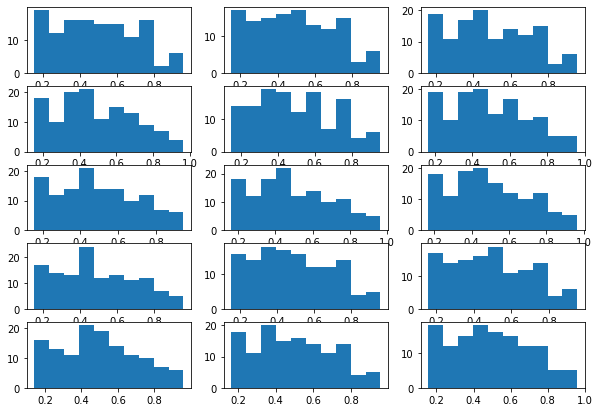

In [5]:
# Creating histogram0
fig, ax = plt.subplots(5,3,figsize =(10, 7)) #
for i in range(15):
  ax[i//3, i%3].hist(a1[:,i]) 
# Show plot
plt.show()


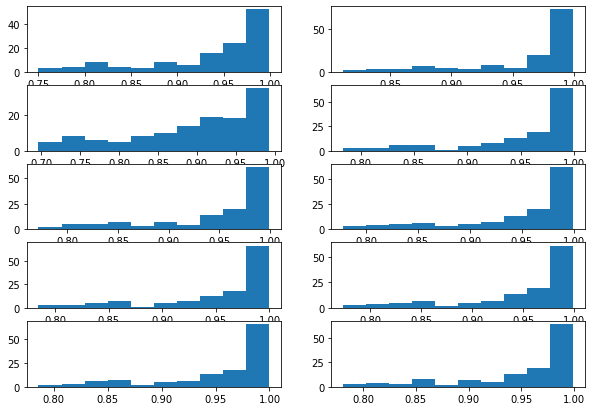

In [6]:
r = 0
fig, ax = plt.subplots(5,2,figsize =(10, 7)) #
for i in range(10):
  ax[i//2, i%2].hist(a2[:,i]) 
# Show plot
plt.show()

## Without BatchNorm

In [7]:
class MultilayerPerceptron():

    def __init__(self, num_features, num_hidden, num_classes):
        super(MultilayerPerceptron, self).__init__()
        
        self.num_classes = num_classes
        
        # hidden 1
        self.weight_1 = torch.zeros(num_hidden, num_features, 
                                    dtype=torch.float).uniform_(0.0, 1.0)
        self.bias_1 = torch.zeros(num_hidden, dtype=torch.float)
        
        # output
        self.weight_o = torch.zeros(self.num_classes, num_hidden, 
                                    dtype=torch.float).uniform_(0.0, 1.0)
        self.bias_o = torch.zeros(self.num_classes, dtype=torch.float)
        
    def forward(self, x):
        # hidden 1
        
        # input dim: [n_hidden, n_features] dot [n_features, n_examples] .T
        # output dim: [n_examples, n_hidden]
        z_1 = torch.mm(x, self.weight_1.t()) + self.bias_1
        
        # z_1 = (z_1 - z_1.mean(dim=0)) / z_1.std(dim=0) 
        a_1 = torch.sigmoid(z_1)

        # hidden 2
        # input dim: [n_classes, n_hidden] dot [n_hidden, n_examples] .T
        # output dim: [n_examples, n_classes]
        z_2 = torch.mm(a_1, self.weight_o.t()) + self.bias_o
        a_2 = torch.sigmoid(z_2)
        return a_1, a_2

In [8]:
model_without_batchNorm = MultilayerPerceptron(784,15,10)
# for i, (features, target) in enumerate(train_loader):
features, target = list(train_loader)[0]
features = features.view(-1,28*28)
a1_w,a2_w = model_without_batchNorm.forward(features)

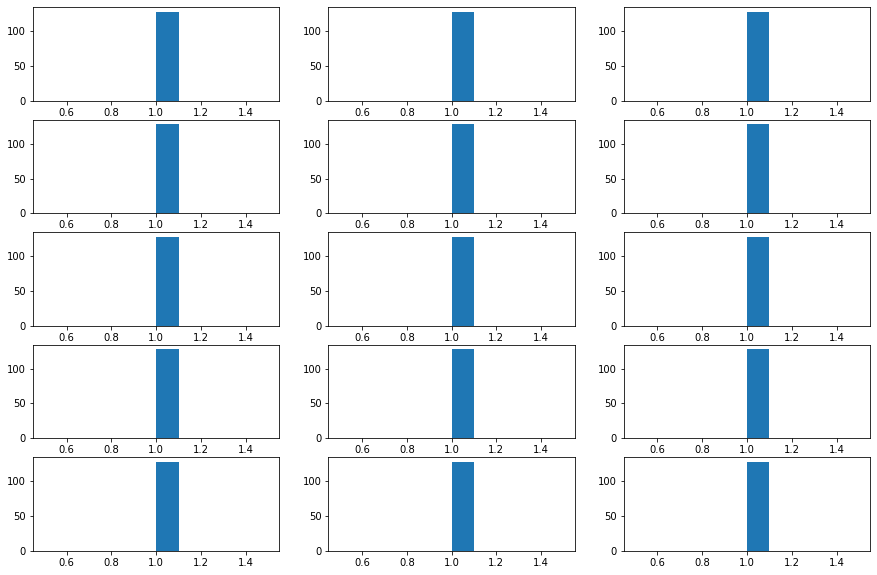

In [9]:
# # Creating histogram
fig, ax = plt.subplots(5,3) #
fig.set_figheight(10)
fig.set_figwidth(15)
cnt = 0
for i in range(5):
  for j in range(3):
    ax[i,j].hist(a1_w[:,cnt])
    cnt += 1

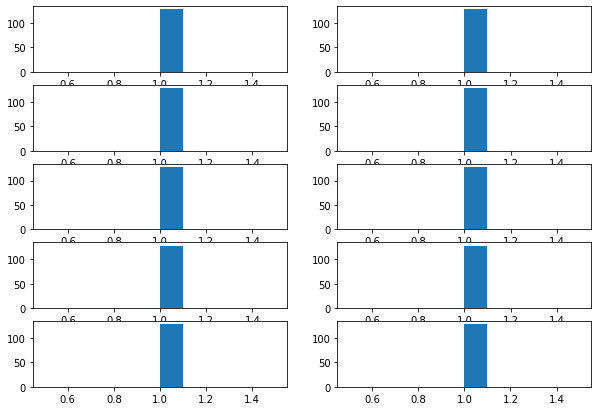

In [10]:
r = 0
fig, ax = plt.subplots(5,2,figsize =(10, 7)) #
for i in range(10):
  ax[i//2, i%2].hist(a2_w[:,i]) 
# Show plot
plt.show()

## When applying batch norm, the activations get normalised and without it the wights and inputs are 1 as the wights are positive and do not get distributed.

In [11]:
class MultilayerPerceptron():

    def __init__(self, num_features, num_hidden, num_classes, momentum):
        super(MultilayerPerceptron, self).__init__()
        
        self.num_classes = num_classes

        self.momentum = momentum
        self.moving_average = torch.zeros(num_hidden, dtype=torch.float)
        self.moving_std = torch.zeros(num_hidden, dtype=torch.float)
        # hidden 1
        self.weight_1 = torch.zeros(num_hidden, num_features, 
                                    dtype=torch.float).uniform_(0.0, 1.0)
        self.bias_1 = torch.zeros(num_hidden, dtype=torch.float)
        
        # output
        self.weight_o = torch.zeros(self.num_classes, num_hidden, 
                                    dtype=torch.float).uniform_(0.0, 1.0)
        self.bias_o = torch.zeros(self.num_classes, dtype=torch.float)
        
    def forward(self, x, test=False):
        # hidden 1
        
        # input dim: [n_hidden, n_features] dot [n_features, n_examples] .T
        # output dim: [n_examples, n_hidden]
        z_1 = torch.mm(x, self.weight_1.t()) + self.bias_1
        mean = z_1.mean(dim=0)
        std = z_1.std(dim=0)
        if not test:
          z_1 = (z_1 - mean) /std 
        else:
          z_1 = (z_1 - self.moving_average)/ self.moving_std 
        a_1 = torch.sigmoid(z_1)
        
        if not test:
          self.moving_average = self.momentum*self.moving_average + (1-self.momentum) * mean
          self.moving_std = self.momentum * self.moving_std + (1 - self.momentum) * std

        # hidden 2
        # input dim: [n_classes, n_hidden] dot [n_hidden, n_examples] .T
        # output dim: [n_examples, n_classes]
        z_2 = torch.mm(a_1, self.weight_o.t()) + self.bias_o
        a_2 = torch.sigmoid(z_2)
        return a_1, a_2

In [12]:
model = MultilayerPerceptron(784,15,10,0.1)
# for i, (features, target) in enumerate(train_loader):
features, target = list(train_loader)[0]
features = features.view(-1,28*28)
a1,a2 = model.forward(features)

In [13]:
test_features, test_target = list(train_loader)[1]

In [14]:
a1,a2 = model.forward(test_features.view(-1,28*28),True)

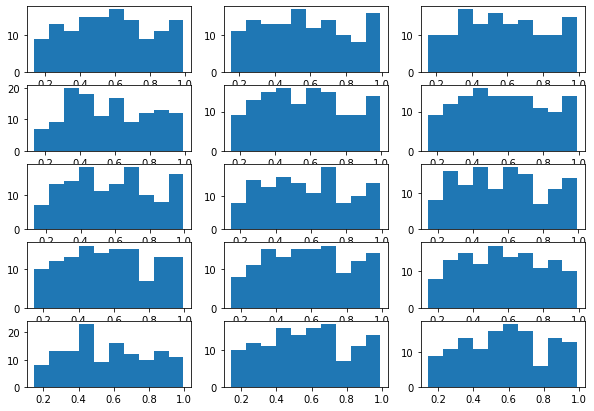

In [15]:
# Creating histogram0
fig, ax = plt.subplots(5,3,figsize =(10, 7)) #
for i in range(15):
  ax[i//3, i%3].hist(a1[:,i]) 
# Show plot
plt.show()

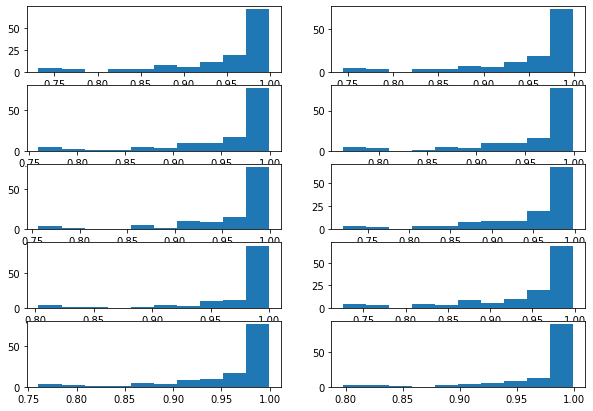

In [16]:
r = 0
fig, ax = plt.subplots(5,2,figsize =(10, 7)) #
for i in range(10):
  ax[i//2, i%2].hist(a2[:,i]) 
# Show plot
plt.show()